In [70]:
import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
parts = glob.glob('./results/experiment-join/*')

In [72]:
files = []
for part in parts:
    sub_parts = glob.glob(os.path.join(part, 'part-*'))
    for sub in sub_parts:
        files.append(sub)

In [73]:
files = np.array(files).flatten()

In [74]:
print(files[:5])

['./results/experiment-join/result-1633627380000/part-00001'
 './results/experiment-join/result-1633627380000/part-00000'
 './results/experiment-join/result-1633610184000/part-00001'
 './results/experiment-join/result-1633610184000/part-00000'
 './results/experiment-join/result-1633610244000/part-00001']


In [75]:
data = []
for file in files:
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            point = json.loads(line.replace("'", '"'))
            data.append(point)

In [76]:
df = pd.DataFrame(data, columns=['packID', 'price', 'time', 'latency'])

In [77]:
# df['t'] = df['time'] - df['time'].min()
#

In [78]:
# df = df.sort_values('t')
print(df.head(10))
print(df.describe())

   packID   price          time     latency
0     NaN   73.60  1.633610e+09  846.667430
1     NaN   24.94  1.633610e+09  846.706038
2     NaN  195.53  1.633610e+09  846.499154
3     NaN    5.07  1.633610e+09  846.536495
4     NaN  508.05  1.633610e+09  846.597618
5     NaN  967.34  1.633610e+09  906.495471
6     NaN  321.32  1.633610e+09  906.372839
7     NaN  105.18  1.633610e+09  906.458289
8     NaN   80.69  1.633610e+09  906.502990
9     NaN   58.64  1.633610e+09  714.526537
       packID          price          time      latency
count     0.0    1075.000000  1.075000e+03  1075.000000
mean      NaN    1381.128977  1.633610e+09   460.794717
std       NaN   13947.413774  2.714120e+02   271.331601
min       NaN       0.010000  1.633609e+09     2.917311
25%       NaN      37.725000  1.633610e+09   224.740581
50%       NaN     125.790000  1.633610e+09   462.584890
75%       NaN     327.565000  1.633610e+09   694.689689
max       NaN  281627.380000  1.633610e+09   930.555982


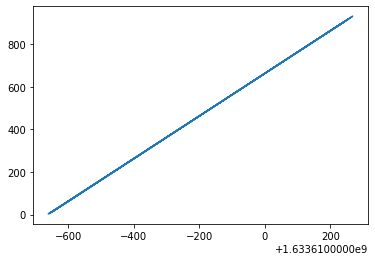

In [79]:
plt.plot(df['time'], df['latency'])